# Analisis Akurasi Biaya Kurir B2B

## I. Pendahuluan

Pada hari ini dalam dunia industri e-commerce yang serba cepat, sangatlah penting akan adanya pengiriman pesanan yang cepat dan efisien. Oleh karena itu untuk memastikan pesanan dapat dipenuhi dengan lancar, seringkali pelaku usaha e-commerce melakukan kerjasama dan mitra dengan perusahaan kurir untuk mengirimkan barang mereka kepada pelanggan mereka. Namun, pengelolaan biaya yang dikumpulkan oleh perusahaan kurir ini mungkin sangat sulit, terlebih lagi terdapat volume pesanan yang tinggi. Hal ini merupakan permasalahan yang terus menerus terjadi pada bisnis B2B ketika ketika terdapat ketidaksesuaian estimasi biaya pada faktur yang sama. 

## II. Tujuan

Analisis ini memiliki tujuan untuk penilaian keakuratan biaya yang dibebankan oleh perusahaan kurir untuk pengiriman barang dalma transaksi dengan bisnis B2B. Sehingga nantinya kita dapat memastikan bahwa perusahaan dapat ditagih dengan tepat untuk layanan dari perusahaan kurir.

## III. Workflow Project

1. Data Collection : Tahap ini merupakan langkah awal dalam analisis data, di mana data dikumpulkan dari berbagai sumber. 

2. Exploratory Data Analysis (EDA) : Tahap ini bertujuan untuk memahami karakteristik data yang telah dikumpulkan.

3. Data Processing : Tahap ini dilakukan untuk membersihkan dan mengolah data agar siap untuk dianalisis.

4. Kesimpulan : Tahap terakhir adalah menarik kesimpulan dari hasil analisis data. Kesimpulan harus berdasarkan fakta dan data yang telah dianalisis.

## A. Data Collection

- SKU Master adalah suatu kode khas yang dipakai untuk mengidentifikasi produk dalam sistem inventaris. Biasanya, SKU Master memiliki perbedaan dengan SKU (Stock Keeping Unit) reguler yang berfungsi untuk melacak variasi individual dari produk (contohnya, warna, ukuran).

- Pincode Mapping  adalah proses yang melibatkan pencocokan kode pos dengan lokasi geografis, seringkali dalam bentuk koordinat GPS. Proses ini dilakukan dengan memanfaatkan database yang memuat informasi mengenai kode pos beserta lokasi geografis yang terkait.

- Courier invoice atau faktur kurir adalah dokumen yang digunakan dalam proses pengiriman barang oleh jasa kurir. Dokumen ini berfungsi sebagai bukti transaksi antara pengirim, penerima, dan jasa kurir, serta memuat informasi penting terkait pengiriman.


### Subset Data

In [100]:
import pandas as pd

# Subset Data
laporan_pesanan = pd.read_csv("D:/Kuliah UNAIR/Projek Aby/1 Projek (B2B Courir Charges)/Data/Order Report.csv")
sku_master = pd.read_csv("D:/Kuliah UNAIR/Projek Aby/1 Projek (B2B Courir Charges)/Data/SKU Master.csv")
pincode_mapping = pd.read_csv("D:/Kuliah UNAIR/Projek Aby/1 Projek (B2B Courir Charges)/Data/pincodes.csv")
courier_invoice = pd.read_csv("D:/Kuliah UNAIR/Projek Aby/1 Projek (B2B Courir Charges)/Data/Invoice.csv")
courier_company_rates = pd.read_csv("D:/Kuliah UNAIR\Projek Aby/1 Projek (B2B Courir Charges)/Data/Courier Company - Rates.csv")

print("Laporan Pesanan")
print(laporan_pesanan.head())
print("\nSKU Master")
print(sku_master.head())
print("\nPincode Mapping")
print(pincode_mapping.head())
print("\nCourier Invoice")
print(courier_invoice.head())
print("\nCourier Company Rates")
print(courier_company_rates.head())



Laporan Pesanan
   ExternOrderNo            SKU  Order Qty  Unnamed: 3  Unnamed: 4
0     2001827036  8904223818706        1.0         NaN         NaN
1     2001827036  8904223819093        1.0         NaN         NaN
2     2001827036  8904223819109        1.0         NaN         NaN
3     2001827036  8904223818430        1.0         NaN         NaN
4     2001827036  8904223819277        1.0         NaN         NaN

SKU Master
             SKU  Weight (g)  Unnamed: 2  Unnamed: 3  Unnamed: 4
0  8904223815682         210         NaN         NaN         NaN
1  8904223815859         165         NaN         NaN         NaN
2  8904223815866         113         NaN         NaN         NaN
3  8904223815873          65         NaN         NaN         NaN
4  8904223816214         120         NaN         NaN         NaN

Pincode Mapping
   Warehouse Pincode  Customer Pincode Zone  Unnamed: 3  Unnamed: 4
0             121003            507101    d         NaN         NaN
1             121003       

<>:9: SyntaxWarning: invalid escape sequence '\P'
<>:9: SyntaxWarning: invalid escape sequence '\P'
C:\Users\User\AppData\Local\Temp\ipykernel_14048\757324825.py:9: SyntaxWarning: invalid escape sequence '\P'
  courier_company_rates = pd.read_csv("D:/Kuliah UNAIR\Projek Aby/1 Projek (B2B Courir Charges)/Courier Company - Rates.csv")


## B. Exploratory Data Analysis

### 1) Cek Missing Data

In [101]:
# Mengecek Data Missing

print("\nMissing Value di Laporan Pesanan")
print(laporan_pesanan.isnull().sum())
print("\nMissing Value di SKU Master")
print(sku_master.isnull().sum())
print("\nMissing Value di Pincode Mapping")
print(pincode_mapping.isnull().sum())
print("\nMissing Value di Courir Invoice")
print(courier_invoice.isnull().sum())
print("\nMissing Value di Courier Company Rates")
print(courier_company_rates.isnull().sum())



Missing Value di Laporan Pesanan
ExternOrderNo      0
SKU                0
Order Qty          0
Unnamed: 3       400
Unnamed: 4       400
dtype: int64

Missing Value di SKU Master
SKU            0
Weight (g)     0
Unnamed: 2    66
Unnamed: 3    66
Unnamed: 4    66
dtype: int64

Missing Value di Pincode Mapping
Warehouse Pincode      0
Customer Pincode       0
Zone                   0
Unnamed: 3           124
Unnamed: 4           124
dtype: int64

Missing Value di Courir Invoice
AWB Code                0
Order ID                0
Charged Weight          0
Warehouse Pincode       0
Customer Pincode        0
Zone                    0
Type of Shipment        0
Billing Amount (Rs.)    0
dtype: int64

Missing Value di Courier Company Rates
fwd_a_fixed         0
fwd_a_additional    0
fwd_b_fixed         0
fwd_b_additional    0
fwd_c_fixed         0
fwd_c_additional    0
fwd_d_fixed         0
fwd_d_additional    0
fwd_e_fixed         0
fwd_e_additional    0
rto_a_fixed         0
rto_a_additio

### 2) Membersihkan data

Disini saya akan menghapus beberapa kolom dari 3 dataframe yaitu Laporan Pesanan, Sku Master dan Pincode Mapping. Dengan rincian kolom yang dihapus sebagai berikut :
1. DataFrame Laporan Pesanan : "Unnamed: 3" dan "Unnamed: 4". 

2. DataFrame SKU Master : "Unnamed: 2", "Unnamed: 3" dan "Unnamed: 4".

3. DataFrame Pincode Mapping : "Unnamed: 3" dan "Unnamed: 4"


In [102]:
# Menghapus kolom di Dataframe Laporan Pesanan
laporan_pesanan = laporan_pesanan.drop(columns = ['Unnamed: 3', 'Unnamed: 4'])

# Menghapus kolom di Dataframe SKU Master
sku_master = sku_master.drop(columns = ['Unnamed: 2','Unnamed: 3', 'Unnamed: 4'])

# Menghapus kolom di Dataframe Pincode Mapping
pincode_mapping = pincode_mapping.drop(columns = ['Unnamed: 3', 'Unnamed: 4'])



In [103]:
print(f"{laporan_pesanan.head()}\n")
print(f"{sku_master.head()}\n")
print(f"{pincode_mapping.head()}\n")

   ExternOrderNo            SKU  Order Qty
0     2001827036  8904223818706        1.0
1     2001827036  8904223819093        1.0
2     2001827036  8904223819109        1.0
3     2001827036  8904223818430        1.0
4     2001827036  8904223819277        1.0

             SKU  Weight (g)
0  8904223815682         210
1  8904223815859         165
2  8904223815866         113
3  8904223815873          65
4  8904223816214         120

   Warehouse Pincode  Customer Pincode Zone
0             121003            507101    d
1             121003            486886    d
2             121003            532484    d
3             121003            143001    b
4             121003            515591    d



## C. Pengolahan Data

### 1) Menggabungkan Dataframe

Dalam proses penggabungan DataFrame ini Saya lakukan dengan beberapa tahapan penggabungan DataFrame, Penjelasan tahapan dijelaskan sebagai berikut :

1. Menggabungkan (merge) Dataframe Laporan Pesanan dan SKU Master berdasarkan variabel "SKU".

2. Menggabungkan Dataframe Courir Invoice dan Pincode Mapping. Dengan tahapan mengambil variabel "Customer Pincode" dari DataFrame Pincode Mapping dan mengambil variabel "Order ID", "Customer Pincode", "Type of Shipment", "Warehouse Pincode", dan "Zone" dari DataFrame Courir Invoice. Lalu hasil dari keduanya digabungkan (merge) berdasarkan variabel "Customer Pincode".

3. Menggabungkan hasil merge poin 1 dan hasil merge poin 2 sehingga menjadi 1 Dataframe berdasarkan variabel "Order ID".


In [104]:
# Menggabungkan (merge) Dataframe Laporan Pesanan dan SKU Master
merged_data = pd.merge(laporan_pesanan, sku_master, on="SKU")

# Mengganti nama variabel ExternOrderNo	dengan Order ID
merged_data = merged_data.rename(columns={"ExternOrderNo" : "Order ID"})

merged_data.head()

,Order ID,SKU,Order Qty,Weight (g)
0,2001827036,8904223818706,1.0,127
1,2001821995,8904223818706,1.0,127
2,2001819252,8904223818706,1.0,127
3,2001816996,8904223818706,1.0,127
4,2001814580,8904223818706,1.0,127


In [105]:
# Mengambil Variabel variabel yang tidak sama berdasarkan variabel Customer Pincode
abc_courier = pincode_mapping.drop_duplicates(subset=["Customer Pincode"])

# Mengambil beberapa variabel dari DataFrame Courier Invoice
courier_abc = courier_invoice[['Order ID', 'Customer Pincode', 'Type of Shipment']]

# Menggabungkan abc_courier dengan courier_abc berdasarkan customer pincode
pincodes = courier_abc.merge(abc_courier, on = "Customer Pincode")

pincodes.head()



,Order ID,Customer Pincode,Type of Shipment,Warehouse Pincode,Zone
0,2001806232,507101,Forward charges,121003,d
1,2001806273,486886,Forward charges,121003,d
2,2001806408,532484,Forward charges,121003,d
3,2001806458,143001,Forward charges,121003,b
4,2001807012,515591,Forward charges,121003,d


In [106]:
# Menggabungkan semua hasil merge menjadi 1 DataFrame
merged2 = merged_data.merge(pincodes, on = "Order ID")
merged2.head()

,Order ID,SKU,Order Qty,Weight (g),Customer Pincode,Type of Shipment,Warehouse Pincode,Zone
0,2001827036,8904223818706,1.0,127,173213,Forward charges,121003,e
1,2001827036,8904223819093,1.0,150,173213,Forward charges,121003,e
2,2001827036,8904223819109,1.0,100,173213,Forward charges,121003,e
3,2001827036,8904223818430,1.0,165,173213,Forward charges,121003,e
4,2001827036,8904223819277,1.0,350,173213,Forward charges,121003,e


### 2) Penghitungan Variabel Baru Weight Slab

Pada Bagian untuk mencari Weight Slab pertama yang saya lakukan adalah menghitung variabel berat dengan satuan Kilogram dengan cara membagi semua data pada variabel weight dengan 1000. Setelah itu dibuatlah fungsi dengan ketentuan sebagai berikut :

1. Menghitung sisa berat dibagi dengan 1 dan membulatkannya ke satu tempat desimal. Jika sisanya 0.0 maka berat adlaah kelipatan 1 KG, dan fungsi akan mengembalikan berat yang sama.

2. Jika sisa lebih besar dari 0.5 berarti beratnya melebihi lempengan setengah KG. Fungsi akan membulatkan bobot ke bilangan bulat terdekat dan menambahkan 1 pada niainya.

3. Jika sisa kurang dari 0.5 berarti beratnya masuk ke dalam braket setengah KG. Fungsi akan membulatkan bobot ke bilangan bulat terdekat dan akan menambahkan 0.5 pada nilainya.

In [107]:
# Menghitung Variabel Weight dengan satuan Kilogram
merged2["Weight (Kgs)"] = merged2["Weight (g)"]/1000

merged2.head()

,Order ID,SKU,Order Qty,Weight (g),Customer Pincode,Type of Shipment,Warehouse Pincode,Zone,Weight (Kgs)
0,2001827036,8904223818706,1.0,127,173213,Forward charges,121003,e,0.127
1,2001827036,8904223819093,1.0,150,173213,Forward charges,121003,e,0.150
2,2001827036,8904223819109,1.0,100,173213,Forward charges,121003,e,0.100
3,2001827036,8904223818430,1.0,165,173213,Forward charges,121003,e,0.165
4,2001827036,8904223819277,1.0,350,173213,Forward charges,121003,e,0.350


In [108]:
# Pembuatan Fungsi Weight Slab
def weight_slab(berat):
    i = round(berat%1,1)
    if i == 0.0:
        return berat
    elif i > 0.5:
        return int(berat)+1.0
    else:
        return int(berat)+0.5
    
merged2["Weight Slab (Kgs)"] = (merged2["Weight (Kgs)"]
                                .apply(weight_slab))
courier_invoice["Biaya Slab Weight Dari Perusahaan"] = (courier_invoice["Charged Weight"]
                                                   .apply(weight_slab))

# Merename beberapa nama kolom
courier_invoice = courier_invoice.rename(columns={"Zone" : "Delivery Zone Charged by Courier Company"})
merged2 = merged2.rename(columns = {"Zone" : "Delivery Zone As Per ABC"})
merged2 = merged2.rename(columns = {"Weight Slab (Kgs)" : "Weight Slab As Per ABC"})


### 3) Penghitungan Expected Charges (Biaya yang diharapkan)

Pada tahap ini, saya melakukan pengulangan untuk setiap baris dalam Dataframe "merged2" yang nantinya digunakan utnutk menghitung biaya yang diharap. Saya mengambil tarfi dan parameter yang dibutuhkan berdasarkan area pengiriman.

Lalu jika jenis pengiriman adalah "Forward Charges" saya menghitung berat tambahan di luar berat dasar slab (0,5 KG) dan menerapkan biaya tambahan yang sesuai. Namun jika jenis pengiriman adalah "Forward and RTO charges" masih mempertimbangkan biaya tambahan untuk RTO.

In [109]:
total_biaya_harapan = [] # Variabel yang berisi total biaya harapan

# Perulangan untuk mencari nilai biaya harapan
for _, row in merged2.iterrows():
    fwd_category = "fwd_" + row["Delivery Zone As Per ABC"]
    fwd_fixed = courier_company_rates.at[0, fwd_category + "_fixed"]
    fwd_additional = courier_company_rates.at[0, fwd_category + "_additional"]
    rto_category = "fwd_" + row["Delivery Zone As Per ABC"]
    rto_fixed = courier_company_rates.at[0, rto_category + "_fixed"]
    rto_additional = courier_company_rates.at[0, rto_category + "_additional"]

    weight_slab = row["Weight Slab As Per ABC"]

    if row["Type of Shipment"] == "Forward charges":
        berat_tambahan = max(0, (weight_slab-0.5)/0.5)
        total_biaya_harapan.append(fwd_fixed + berat_tambahan * fwd_additional)
    elif row["Type of Shipment"] == "Forward and RTO charges":
        berat_tambahan = max(0, (weight_slab-0.5)/0.5)
        total_biaya_harapan.append(fwd_fixed + berat_tambahan * (fwd_additional + rto_additional))
    else:
        total_biaya_harapan.append(0)


merged2["Expected Charge as per ABC"] = total_biaya_harapan

merged2.head()


,Order ID,SKU,Order Qty,Weight (g),Customer Pincode,Type of Shipment,Warehouse Pincode,Delivery Zone As Per ABC,Weight (Kgs),Weight Slab As Per ABC,Expected Charge as per ABC
0,2001827036,8904223818706,1.0,127,173213,Forward charges,121003,e,0.127,0.5,56.6
1,2001827036,8904223819093,1.0,150,173213,Forward charges,121003,e,0.150,0.5,56.6
2,2001827036,8904223819109,1.0,100,173213,Forward charges,121003,e,0.100,0.5,56.6
3,2001827036,8904223818430,1.0,165,173213,Forward charges,121003,e,0.165,0.5,56.6
4,2001827036,8904223819277,1.0,350,173213,Forward charges,121003,e,0.350,0.5,56.6


### 4) Final DataFrame

In [110]:
# Menggabungkan DataFrame merged2 dengan Courier Invoice berdasarkan variabel "Order ID"
merged_output = merged2.merge(courier_invoice, on="Order ID")
merged_output.head()


,Order ID,SKU,Order Qty,Weight (g),Customer Pincode_x,Type of Shipment_x,Warehouse Pincode_x,Delivery Zone As Per ABC,Weight (Kgs),Weight Slab As Per ABC,Expected Charge as per ABC,AWB Code,Charged Weight,Warehouse Pincode_y,Customer Pincode_y,Delivery Zone Charged by Courier Company,Type of Shipment_y,Billing Amount (Rs.),Biaya Slab Weight Dari Perusahaan
0,2001827036,8904223818706,1.0,127,173213,Forward charges,121003,e,0.127,0.5,56.6,1091122418320,1.6,121003,173213,b,Forward charges,117.9,2.0
1,2001827036,8904223819093,1.0,150,173213,Forward charges,121003,e,0.150,0.5,56.6,1091122418320,1.6,121003,173213,b,Forward charges,117.9,2.0
2,2001827036,8904223819109,1.0,100,173213,Forward charges,121003,e,0.100,0.5,56.6,1091122418320,1.6,121003,173213,b,Forward charges,117.9,2.0
3,2001827036,8904223818430,1.0,165,173213,Forward charges,121003,e,0.165,0.5,56.6,1091122418320,1.6,121003,173213,b,Forward charges,117.9,2.0
4,2001827036,8904223819277,1.0,350,173213,Forward charges,121003,e,0.350,0.5,56.6,1091122418320,1.6,121003,173213,b,Forward charges,117.9,2.0


### 5) Menghitung Perbedaan Biaya dengan Biaya yang diharapkan

In [111]:
df_dif = merged_output
df_dif["Difference (Rs.)"] = df_dif["Billing Amount (Rs.)"] - df_dif["Expected Charge as per ABC"]

df_new = df_dif[["Order ID", "Difference (Rs.)", "Expected Charge as per ABC"]]
df_new.head()

,Order ID,Difference (Rs.),Expected Charge as per ABC
0,2001827036,61.3,56.6
1,2001827036,61.3,56.6
2,2001827036,61.3,56.6
3,2001827036,61.3,56.6
4,2001827036,61.3,56.6


### 6) Mengitung Kesimpulan Keakuratan Biaya kurir B2B

In [118]:
# Menghitung Total Pesanan di semua kategori
jumlah_bayar_benar = len(df_new[df_new["Difference (Rs.)"]==0])
jumlah_bayar_lebih = len(df_new[df_new["Difference (Rs.)"]>0])
jumlah_bayar_kurang = len(df_new[df_new["Difference (Rs.)"]<0])

# Menghitung Total Nilai Pesanan di semua kategori
nilai_benar = df_new[df_new["Difference (Rs.)"]==0]["Expected Charge as per ABC"].sum()
nilai_lebih = df_new[df_new["Difference (Rs.)"]>0]["Difference (Rs.)"].sum()
nilai_kurang = df_new[df_new["Difference (Rs.)"]<0]["Difference (Rs.)"].sum()

# Membuat DataFrame baru untuk kesimpulan
hasil = {"Deskripsi" : ["Total Pesanan jika tagihan benar",
                             "Total Pesanan jika tagihan lebih",
                             "Total Pesanan jika tagihan kurang"],
              "Jumlah(count)" : [jumlah_bayar_benar,jumlah_bayar_lebih,jumlah_bayar_kurang],
              "Nilai (amount (Rs,))" : [nilai_benar,nilai_lebih,nilai_kurang] 

}

kesimpulan = pd.DataFrame(hasil)
kesimpulan.head()


,Deskripsi,Jumlah(count),"Nilai (amount (Rs,))"
0,Total Pesanan jika tagihan benar,12,507.6
1,Total Pesanan jika tagihan lebih,382,33750.5
2,Total Pesanan jika tagihan kurang,7,-165.2


### 7) Visualisasi Hasil

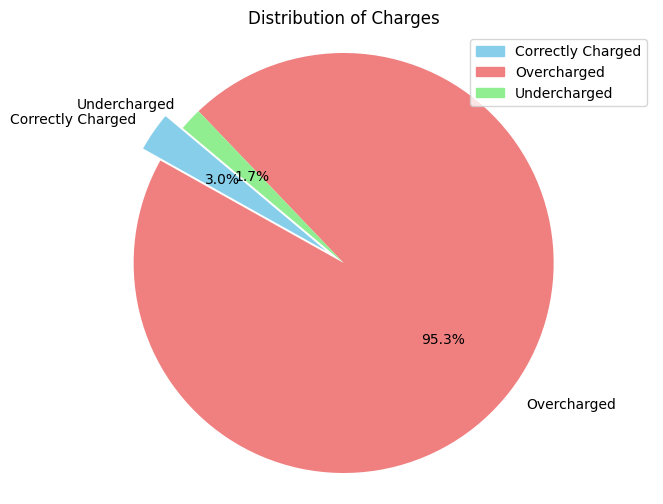

In [123]:
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

# Data untuk pie chart
labels = ['Correctly Charged','Overcharged', 'Undercharged']
sizes = [jumlah_bayar_benar, jumlah_bayar_lebih, jumlah_bayar_kurang]
colors = ['skyblue', 'lightcoral', 'lightgreen']  # Warna yang berbeda untuk setiap kategori
explode = (0.1, 0, 0)  # Memisahkan potongan "Overcharged"

# Membuat pie chart
fig, ax = plt.subplots(figsize=(8, 6))
patches, texts, autotexts = ax.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)

# Menambahkan label keterangan warna
legend_labels = ['Correctly Charged','Overcharged', 'Undercharged']
legend_colors = ['skyblue', 'lightcoral', 'lightgreen']
legend_patches = [Patch(color=color, label=label) for color, label in zip(legend_colors, legend_labels)]
plt.legend(handles=legend_patches, loc="best")

# Menambahkan judul
plt.title('Distribution of Charges')

# Menampilkan pie chart
plt.axis('equal')  # Memastikan pie chart terlihat sebagai lingkaran
plt.show()


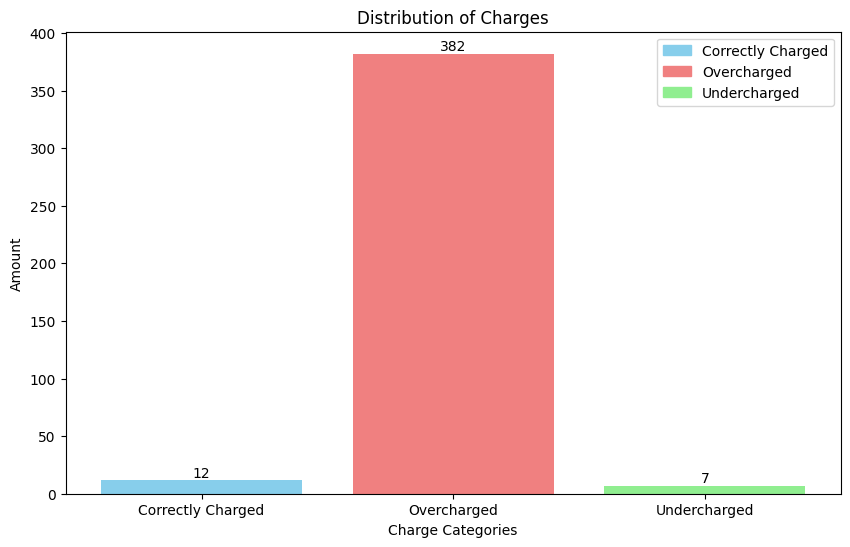

In [124]:
import matplotlib.pyplot as plt

# Data untuk bar chart
categories = ['Correctly Charged', 'Overcharged', 'Undercharged']
sizes = [jumlah_bayar_benar, jumlah_bayar_lebih, jumlah_bayar_kurang]
colors = ['skyblue', 'lightcoral', 'lightgreen']  # Warna yang berbeda untuk setiap kategori

# Membuat bar chart
plt.figure(figsize=(10, 6))
plt.bar(categories, sizes, color=colors)

# Menambahkan label keterangan warna
legend_labels = ['Correctly Charged', 'Overcharged', 'Undercharged']
legend_colors = ['skyblue', 'lightcoral', 'lightgreen']
legend_patches = [plt.Rectangle((0,0),1,1, color=color, label=label) for color, label in zip(legend_colors, legend_labels)]
plt.legend(handles=legend_patches)

# Menambahkan label nilai di atas setiap bar
for i, size in enumerate(sizes):
    plt.text(i, size, str(size), ha='center', va='bottom')

# Menambahkan judul dan label sumbu
plt.title('Distribution of Charges')
plt.xlabel('Charge Categories')
plt.ylabel('Amount')

# Menampilkan bar chart
plt.show()


## D. Kesimpulan

Analisis akurasi biaya kurir B2B berfokus pada penilaian keakuratan biaya yang dibebankan oleh perusahaan kurir untuk pengiriman barang dalam transaksi B2B. Dan dari hasil analisis yang telah digunakan didapatkan kesimpulan bahwa sebagian besar biaya kuriri pengiriman B2B cenderung Overcharged, yang berarti bahwa  biaya pengiriman yang dikenakan pada suatu pengiriman lebih tinggi dari yang seharusnya sesuai dengan layanan yang diberikan atau karakteristik pengiriman tersebut. 